In [51]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("/Users/amirmedris/Desktop/facialexpression/"))

# # Any results you write to the current directory are saved as output.

['fer2013.csv (1).zip', 'Untitled1.ipynb', 'fer2013.csv', '.DS_Store', 'little_mix_right.jpg', 'facial-expression-detection-cnn.ipynb', 'the_saturdays_right.jpg', 'Untitled.ipynb', 'wallpaper2you_443897.jpg', 'abba_face_detected.jpg', 'README.md', 'FaceDetect-master.zip', 'model_filter.h5', 'live.py', 'face_detect_cv3.py', 'haarcascade_frontalface_default.xml', 'little_mix_wrong.jpg', '.ipynb_checkpoints', 'FaceDetect-master', 'the_saturdays_wrong.jpg', 'face_detect.py', 'abba.png', 'Shawon.jpg']


In [1]:
from Functions import *
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import seaborn as sn
from skimage import io
import cv2 #opencv-python
from time import time

In [2]:

# import tensorflow as tf

# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
# from keras.layers import Dense, Activation, Dropout, Flatten

# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [3]:
# get the data
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [4]:
# def getData(filname):
#     # images are 48x48
#     # N = 35887
#     Y = []
#     X = []
#     first = True
#     for line in open(filname):
#         if first:
#             first = False
#         else:
#             row = line.split(',')
#             Y.append(int(row[0]))
#             X.append([int(p) for p in row[1].split()])

#     X, Y = np.array(X) / 255.0, np.array(Y)
#     return X, Y


In [5]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [6]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()

In [7]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [8]:
# from keras.models import Sequential
# from keras.layers import Dense , Activation , Dropout ,Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.metrics import categorical_accuracy
# from keras.models import model_from_json
# from keras.callbacks import ModelCheckpoint
# from keras.optimizers import *
# from keras.layers.normalization import BatchNormalization


In [9]:
# def my_model():
#     model = Sequential()
#     input_shape = (48,48,1)
#     model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
#     model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
#     model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
#     model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Flatten())
#     model.add(Dense(128))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(7))
#     model.add(Activation('softmax'))
    
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
#     # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
#     #model.summary()
    
#     return model
model=my_model()
# model.summary()

In [10]:
path_model='model_filter.h5' # save model at this location after each epoch
# K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
model.load_weights(path_model)
# K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
# h=model.fit(x=X_train,     
#             y=y_train, 
#             batch_size=64, 
#             epochs=20, 
#             verbose=1, 
#             validation_data=(X_test,y_test),
#             shuffle=True,
#             callbacks=[
#                 ModelCheckpoint(filepath=path_model),
#             ]
#             )

In [11]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [12]:
# def emotion_analysis(emotions):
#     objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
#     y_pos = np.arange(len(objects))
#     plt.bar(y_pos, emotions, align='center', alpha=0.9)
#     plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
#     plt.show()

In [13]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape


(3589, 7)

In [14]:
y_train.shape

(32298, 7)

In [15]:
# import seaborn as sn

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import confusion_matrix
# %matplotlib inline
# cm = confusion_matrix(np.where(y_test == 1)[1], y_pred)
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# df_cm = pd.DataFrame(cm, index = [i for i in "0123456"],
#                   columns = [i for i in "0123456"])
# plt.figure(figsize = (20,15))
# sn.heatmap(df_cm, annot=True)

**Real Time Expression Prediction**

/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


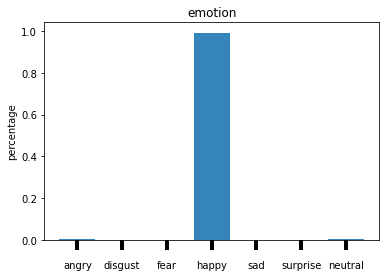

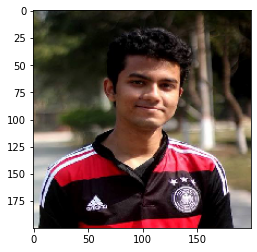

[1.7165205e-03 7.0637514e-09 4.1644453e-06 9.9277639e-01 3.6313798e-04
 8.9109626e-08 5.1397416e-03]
Expression Prediction: happy


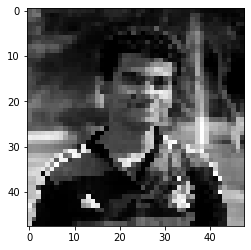

In [16]:
# from skimage import io
img = image.load_img('Shawon.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('Shawon.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
print(a)
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
plt.gray()
plt.imshow(img)
plt.show()
        

img pre img to array: [[0.36078432 0.43529412 0.35686275 ... 0.03137255 0.05098039 0.05490196]
 [0.37254903 0.44313726 0.45882353 ... 0.01176471 0.01960784 0.07450981]
 [0.34117648 0.3254902  0.2627451  ... 0.03921569 0.04313726 0.04313726]
 ...
 [0.75686276 0.7607843  0.01960784 ... 0.6039216  0.58431375 0.5764706 ]
 [0.7529412  0.3254902  0.00784314 ... 0.63529414 0.6117647  0.61960787]
 [0.80784315 0.00392157 0.01176471 ... 0.6509804  0.64705884 0.6666667 ]]
img to array x: [[[241.]
  [241.]
  [241.]
  ...
  [235.]
  [234.]
  [233.]]

 [[241.]
  [241.]
  [241.]
  ...
  [235.]
  [229.]
  [233.]]

 [[241.]
  [241.]
  [241.]
  ...
  [235.]
  [235.]
  [233.]]

 ...

 [[186.]
  [164.]
  [166.]
  ...
  [ 26.]
  [ 22.]
  [ 27.]]

 [[179.]
  [174.]
  [174.]
  ...
  [ 26.]
  [ 28.]
  [ 26.]]

 [[177.]
  [168.]
  [162.]
  ...
  [ 20.]
  [ 20.]
  [ 22.]]]
expanded dims for x [[[[241.]
   [241.]
   [241.]
   ...
   [235.]
   [234.]
   [233.]]

  [[241.]
   [241.]
   [241.]
   ...
   [235.]
   [

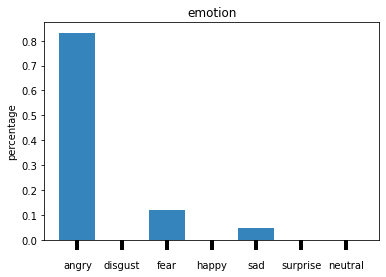

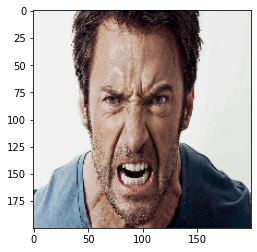

Expression Prediction: angry


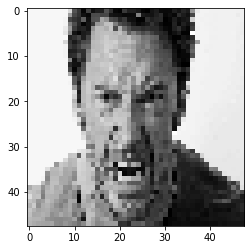

In [17]:
# from skimage import io

img = image.load_img('wallpaper2you_443897.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('wallpaper2you_443897.jpg', grayscale=False, target_size=(200, 200))
print('img pre img to array:',x)
x = image.img_to_array(img)
print('img to array x:',x)
x = np.expand_dims(x, axis = 0)
print('expanded dims for x',x)
x /= 255
print('x normalized:',x)
print('xshape pre prediction',x.shape)
custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
plt.gray()
plt.imshow(img)
plt.show()

**Live Demo of Production Level Project**

[Facial Expression Detection Web App](https://faceai.herokuapp.com/)

In [18]:

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
sfps = 0
  
# used to record the time at which we processed current frame 
fps = 0
while True:
    ret, frame = cap.read()
#     print(frame.shape)
    baseframe = frame
    coords,faces,faceframe = find_faces_in_img(frame,cascade)
    if len(faces) < 1:
        fps=time()
#         print(fps-sfps)
        FPS=1/(fps-sfps)
        sfps = fps 

#         print('FPS:',FPS)
        FPS = 'FPS:'+str(round(FPS,ndigits=3))
        maketextaboveface(baseframe,FPS,(10,70))
        cv2.imshow('feed', baseframe)
        
        c = cv2.waitKey(1)
        if c == 27:
            break

        continue
    for i in range(0,len(faces)):
#     print('frames',frames)
        face = faces[i]
        frame = prep_image(face)

    #     print('frame pre resize',frame)

    #     print('expanded dims for x',frame)
    #     frame /= 255
    #     print('x normalized:',frame)
    #     print('xshape pre prediction',frame.shape)

    #     print('Expression Prediction:',objects[ind])
        prediction = predict_emotion(frame,model)

    #     print('FPS:',FPS)
        text = 'Prediction = '+str(prediction)
        maketextaboveface(baseframe,text,(coords[i][1],coords[i][0]))
    fps=time()
    #     print(fps-sfps)
    FPS=1/(fps-sfps)
    sfps = fps
    FPS = 'FPS:'+str(round(FPS,ndigits=3))+' & We Found '+str(len(faces))+ ' Face(s)!'
    maketextaboveface(baseframe,FPS,(10,70))
    cv2.imshow('feed', baseframe)
    
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [34]:
from Functions import *